#### techniques:
1)frequent category imputation

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Handling Categorical features.ipynb',
 'Handling Missing--categerical features.ipynb',
 'Handling-Missing values.ipynb',
 'house hold.csv',
 'mercedes.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [4]:
df=pd.read_csv('house hold.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [5]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

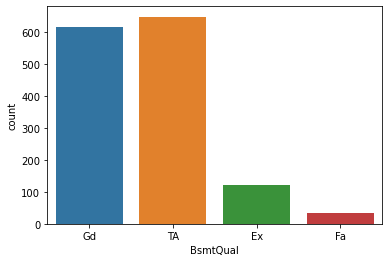

In [9]:
sns.countplot(x="BsmtQual",data=df)

In [14]:
df.groupby('BsmtQual')


In [15]:
for i,j in df.groupby('BsmtQual'):
    print(i)
    print(j)

Ex
     BsmtQual FireplaceQu GarageType  SalePrice
6          Ex          Gd     Attchd     307000
11         Ex          Gd    BuiltIn     345000
20         Ex          Gd    BuiltIn     325300
27         Ex          Gd     Attchd     306000
32         Ex         NaN     Attchd     179900
...       ...         ...        ...        ...
1388       Ex          Gd     Attchd     377500
1405       Ex          Gd     Attchd     275000
1437       Ex          Gd     Attchd     394617
1440       Ex          Gd     Detchd     191000
1442       Ex          Ex     Attchd     310000

[121 rows x 4 columns]
Fa
     BsmtQual FireplaceQu GarageType  SalePrice
74         Fa         NaN     Detchd     107400
106        Fa         NaN     Detchd     100000
181        Fa          Gd     Detchd     200100
184        Fa         NaN     Attchd     127000
187        Fa         NaN     Detchd     135000
202        Fa         NaN     Attchd     112000
246        Fa         NaN     Detchd     137000
264       

In [36]:
for i,j in df.groupby(['BsmtQual'])["BsmtQual"]:
    print(i)
    print(j)


Ex
6       Ex
11      Ex
20      Ex
27      Ex
32      Ex
        ..
1388    Ex
1405    Ex
1437    Ex
1440    Ex
1442    Ex
Name: BsmtQual, Length: 121, dtype: object
Fa
74      Fa
106     Fa
181     Fa
184     Fa
187     Fa
202     Fa
246     Fa
264     Fa
375     Fa
383     Fa
398     Fa
436     Fa
479     Fa
494     Fa
531     Fa
630     Fa
638     Fa
662     Fa
669     Fa
740     Fa
771     Fa
786     Fa
821     Fa
935     Fa
1001    Fa
1034    Fa
1072    Fa
1076    Fa
1186    Fa
1257    Fa
1315    Fa
1382    Fa
1393    Fa
1408    Fa
1448    Fa
Name: BsmtQual, dtype: object
Gd
0       Gd
1       Gd
2       Gd
4       Gd
5       Gd
        ..
1452    Gd
1453    Gd
1454    Gd
1455    Gd
1456    Gd
Name: BsmtQual, Length: 618, dtype: object
TA
3       TA
8       TA
9       TA
10      TA
12      TA
        ..
1445    TA
1446    TA
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 649, dtype: object


In [17]:
 df.groupby(['BsmtQual'])["BsmtQual"].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [27]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

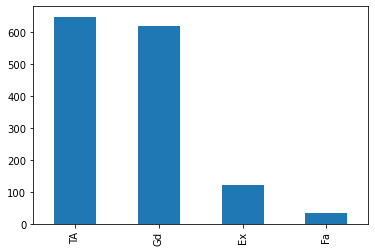

In [39]:
df["BsmtQual"].value_counts().plot.bar()

<AxesSubplot:>

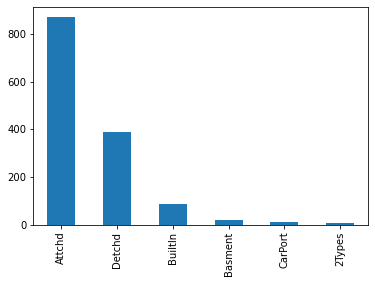

In [40]:
df["GarageType"].value_counts().plot.bar()

<AxesSubplot:>

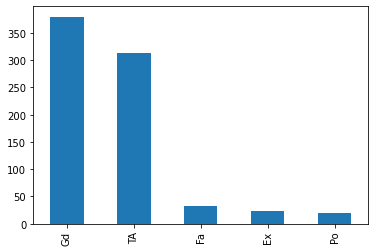

In [41]:
df["FireplaceQu"].value_counts().plot.bar()

In [54]:
def impute_nan(data,variable):
    inputparameter=data[variable].value_counts().index[0]
    print(inputparameter)
    data[variable].fillna(inputparameter,inplace=True)

In [55]:
for feature in ["BsmtQual","GarageType","FireplaceQu"]:
    impute_nan(df,feature)

TA
Attchd
Gd


In [56]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages
Easy To implement   
Fater way to implement 
#### Disadvantages
Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's  
It distorts the relation of the most frequent label

#### Suppose if you have more frequent categories, we just replace NAN with a new category¶
# most used technique

In [57]:
df=pd.read_csv('house hold.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [59]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [61]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [65]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [66]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# probability ratio encoding